In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [4]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# function to draw a histogram given dataframe, featurre name and x axis title name
def plot_hist(df,feature,axis_name):
    fig,ax = plt.subplots(figsize=(6,5))
    plt.hist(df[feature],bins=50)
    plt.xlabel(axis_name)
    plt.show()

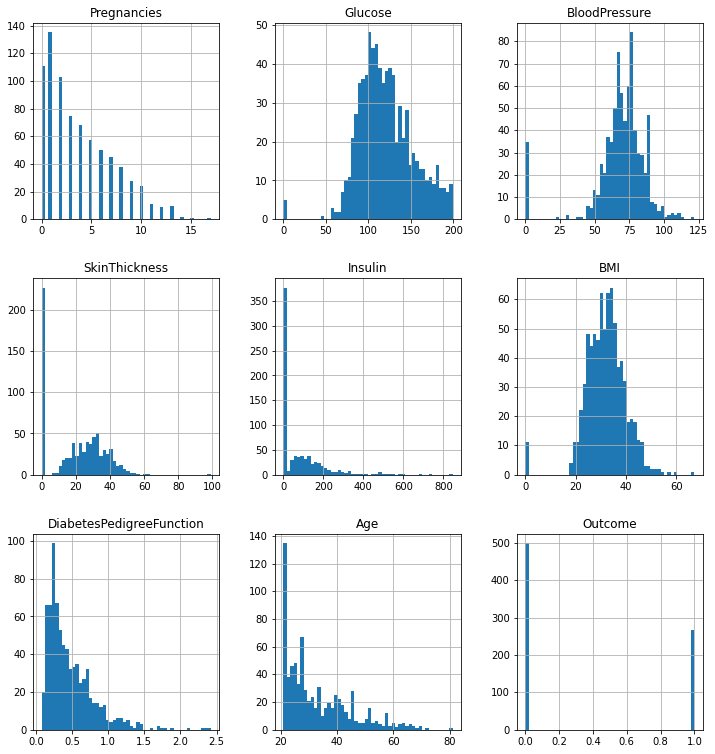

In [9]:
df.hist(figsize=(12,13),bins=50)
plt.show()    
    

In [10]:
# Stoppinig the ooutliers and missing values
# here enters coommon sense and domain knowledge
# frrmo the output of describe and above histograms, we need to carefully check if the distributions make sense

## in our data following variables can't have zero value:

* BMI
* Insulin
* Skin thickness
* Blood pressure
* Glucose

Any of these zero means a person is dead <br>
It means these are missing values <br>
Let's see how many missing values does each of these columns have


In [11]:
# making a list of columns with missing values
ms_col = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
print(f"{'feature name': <15}{'Missing Values':<20}{'% missing values':<10}")
for i in ms_col:
    print(f"{i: <15}{(df[i]==0).sum():<20}{(((df[i]==0).sum())*100)/df.shape[0]: .2f}")

feature name   Missing Values      % missing values
Glucose        5                    0.65
BloodPressure  35                   4.56
SkinThickness  227                  29.56
Insulin        374                  48.70
BMI            11                   1.43


## What to do with these missing values ?
For the features Insulin, Skin Thickness a big fraction of values is missing <br>
We can't just delete the rows with missing values


## Let's first plot the  distribution of outcome for each feature when the value is misssing,
we want to check if they are not biased for a particular outcome, especially for insulin and skin thicknesss 

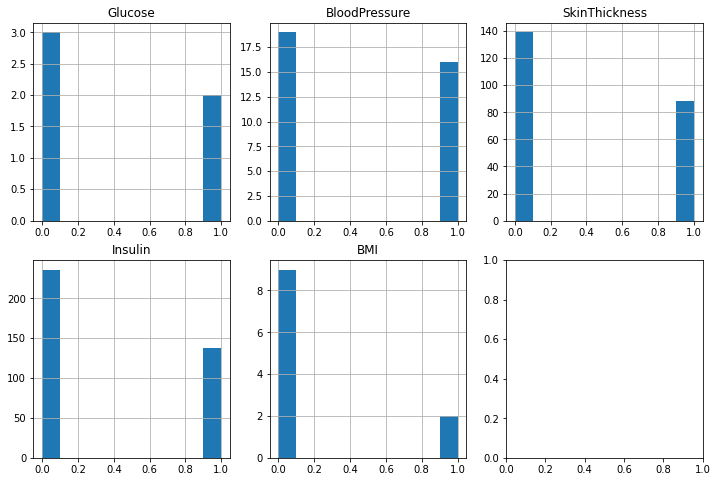

In [12]:
fig,ax = plt.subplots(2,3,figsize=(12,8))
ax = ax.ravel()
j =0
for i in ms_col:
    df[df[i]==0]['Outcome'].hist(ax=ax[j])
    ax[j].set_title(i)
    j=j+1

In both the cases, Skin thickness and insulin. The outcome 0 (no diabetes) has more missing data than outcome 1 (diabetess). In fact the pattern is consistent for all the feature variables with misssing values

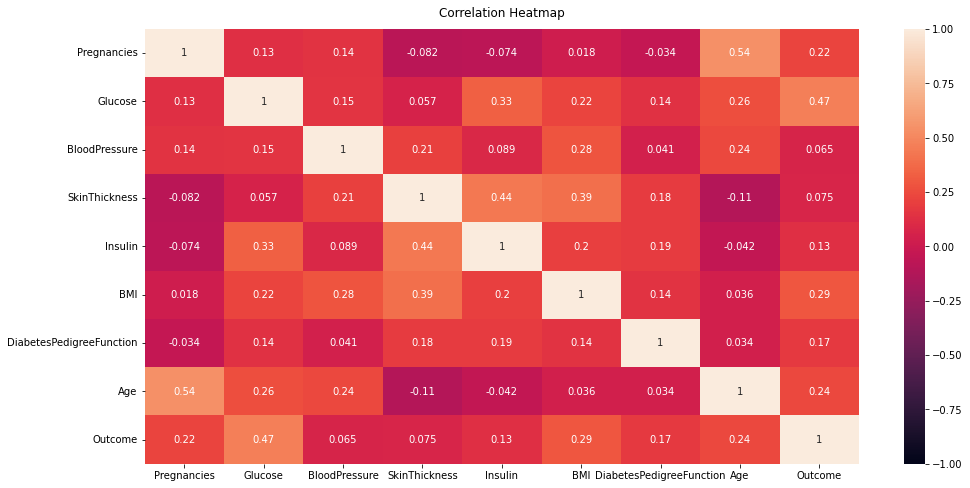

In [13]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);